In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from astropy.time import Time

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('light_curves_181646914411688960_200261994165010176.csv')

In [4]:
df.head()

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
0,181646914411688960,17390384531924047,G,1711.339752,15.674099,10132.264128,64.670419,156.67540,False,True,4101,369295549951641967
1,181646914411688960,19240383064740421,G,1744.799194,15.713665,9769.679686,18.609422,524.98566,False,False,1,369295549951641967
2,181646914411688960,19250123867579313,G,1744.975366,15.703185,9864.433111,14.214431,693.97314,False,False,1,369295549951641967
3,181646914411688960,26786862375244063,G,1881.271776,15.706703,9832.526462,31.084255,316.31854,False,False,4097,369295549951641967
4,181646914411688960,28490402782028622,G,1912.076405,15.698724,9905.046149,13.649018,725.69660,False,False,1,369295549951641967


In [5]:
df.groupby(['source_id', 'time'])['flux_over_error'].first()

source_id           time       
181646914411688960  1711.339752    156.675400
                    1711.340066     50.274986
                    1711.340155     85.977530
                    1744.799194    524.985660
                    1744.799509     62.459710
                                      ...    
200261994165010176  2305.304291    138.551200
                    2305.304376    361.620670
                    2305.377980     70.982050
                    2305.378294    154.087330
                    2305.378379    463.599800
Name: flux_over_error, Length: 86458, dtype: float64

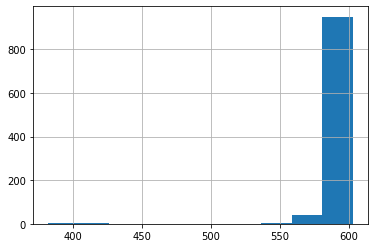

In [6]:
df.groupby('source_id')['time'].apply(lambda x: x.max() - x.min()).hist()

Max diff follows poisson distribution

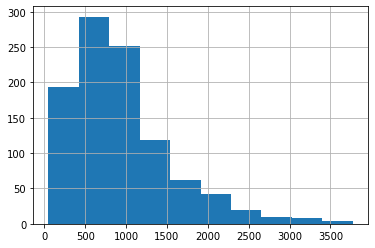

In [7]:
df.groupby('source_id')['flux_over_error'].apply(lambda x: x.max() - x.min()).hist()

In [8]:
df['other_flags'].value_counts()

0          55450
1          16715
4097        6458
4194817     2992
4198913     1057
           ...  
2101257        1
1056768        1
69639          1
3313665        1
4198941        1
Name: other_flags, Length: 399, dtype: int64

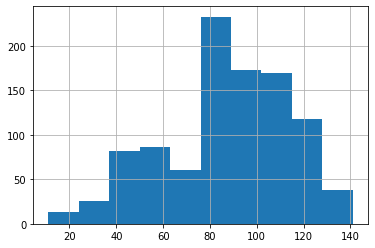

In [9]:
df['source_id'].value_counts().hist()

In [10]:
df['band'].value_counts()

G     31076
BP    27923
RP    27527
Name: band, dtype: int64

In [11]:
df['source_id'].value_counts().head()

184854434646126080    141
187839539996486272    140
188743269835075456    138
188733271151219584    136
187838814144889600    135
Name: source_id, dtype: int64

In [44]:
src = df.loc[df['source_id'] == 184854434646126080]

In [45]:
src.sort_values(by='time', inplace=True)

/home/glenn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
src

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id
9032,184854434646126080,17380585512157341,G,1711.162418,14.791303,22846.784826,24.928159,916.50510,False,False,4194817,369295549951641967
9080,184854434646126080,17380585512157341,BP,1711.162761,15.282809,10652.015753,124.792369,85.35791,False,False,0,369295549951641967
9127,184854434646126080,17380585512157341,RP,1711.162849,14.117023,18111.689433,141.276072,128.20068,False,False,0,369295549951641967
9033,184854434646126080,19240322461372875,G,1744.798038,14.783311,23015.577922,124.460920,184.92212,False,True,36897,369295549951641967
9081,184854434646126080,19240322461372875,BP,1744.798331,15.295649,10526.780632,100.525953,104.71704,False,False,0,369295549951641967
...,...,...,...,...,...,...,...,...,...,...,...,...
9125,184854434646126080,50234160359290702,BP,2305.299255,15.280589,10673.817851,109.641271,97.35219,False,False,0,369295549951641967
9171,184854434646126080,50234160359290702,RP,2305.299342,14.116655,18117.819594,137.591944,131.67792,False,False,0,369295549951641967
9079,184854434646126080,50238252676855330,G,2305.372943,14.784592,22988.436333,27.081270,848.86847,False,False,1,369295549951641967
9126,184854434646126080,50238252676855330,BP,2305.373258,15.280304,10676.621424,114.736023,93.05379,False,False,0,369295549951641967


In [47]:
times = src['time'].values

In [48]:
times = Time(times, format='mjd')

In [49]:
times.utc.iso

/home/glenn/.local/lib/python3.6/site-packages/astropy/_erfa/core.py:107: ErfaWarning: ERFA function "d2dtf" yielded 141 of "dubious year (Note 5)"
  warnings.warn('ERFA function "' + func_name + '" yielded ' + wmsg, ErfaWarning)


array(['1863-07-25 03:53:52.929', '1863-07-25 03:54:22.542',
       '1863-07-25 03:54:30.136', '1863-08-27 19:09:10.440',
       '1863-08-27 19:09:35.837', '1863-08-27 19:09:43.226',
       '1863-08-27 23:22:49.928', '1863-08-27 23:23:17.094',
       '1863-08-27 23:23:24.774', '1864-01-11 12:32:10.938',
       '1864-01-11 12:32:38.101', '1864-01-11 12:32:45.764',
       '1864-01-11 14:18:42.108', '1864-01-11 14:19:11.720',
       '1864-01-11 14:19:19.290', '1864-02-11 06:05:20.614',
       '1864-02-11 06:05:47.790', '1864-02-11 06:05:55.388',
       '1864-03-02 06:06:23.768', '1864-03-02 06:06:51.549',
       '1864-03-02 06:06:59.165', '1864-03-02 07:52:55.638',
       '1864-03-02 07:53:25.248', '1864-03-02 07:53:32.830',
       '1864-07-16 14:32:56.661', '1864-07-16 14:33:23.862',
       '1864-07-16 14:33:31.384', '1864-08-19 00:22:11.250',
       '1864-08-19 00:22:38.442', '1864-08-19 00:22:45.968',
       '1864-08-19 02:08:46.011', '1864-08-19 02:09:13.227',
       '1864-08-19 02:09

In [52]:
src['utc'] = times.utc.iso

/home/glenn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
src

,source_id,transit_id,band,time,mag,flux,flux_error,flux_over_error,rejected_by_photometry,rejected_by_variability,other_flags,solution_id,utc
9032,184854434646126080,17380585512157341,G,1711.162418,14.791303,22846.784826,24.928159,916.50510,False,False,4194817,369295549951641967,1863-07-25 03:53:52.929
9080,184854434646126080,17380585512157341,BP,1711.162761,15.282809,10652.015753,124.792369,85.35791,False,False,0,369295549951641967,1863-07-25 03:54:22.542
9127,184854434646126080,17380585512157341,RP,1711.162849,14.117023,18111.689433,141.276072,128.20068,False,False,0,369295549951641967,1863-07-25 03:54:30.136
9033,184854434646126080,19240322461372875,G,1744.798038,14.783311,23015.577922,124.460920,184.92212,False,True,36897,369295549951641967,1863-08-27 19:09:10.440
9081,184854434646126080,19240322461372875,BP,1744.798331,15.295649,10526.780632,100.525953,104.71704,False,False,0,369295549951641967,1863-08-27 19:09:35.837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,184854434646126080,50234160359290702,BP,2305.299255,15.280589,10673.817851,109.641271,97.35219,False,False,0,369295549951641967,1865-03-10 07:10:55.650
9171,184854434646126080,50234160359290702,RP,2305.299342,14.116655,18117.819594,137.591944,131.67792,False,False,0,369295549951641967,1865-03-10 07:11:03.129
9079,184854434646126080,50238252676855330,G,2305.372943,14.784592,22988.436333,27.081270,848.86847,False,False,1,369295549951641967,1865-03-10 08:57:02.256
9126,184854434646126080,50238252676855330,BP,2305.373258,15.280304,10676.621424,114.736023,93.05379,False,False,0,369295549951641967,1865-03-10 08:57:29.459


In [54]:
data = src[['utc','flux_over_error']]

In [56]:
sns.lineplot(x='utc', y='flux_over_erro')

ValueError: Could not interpret input 'utc'